hierarchical clustering

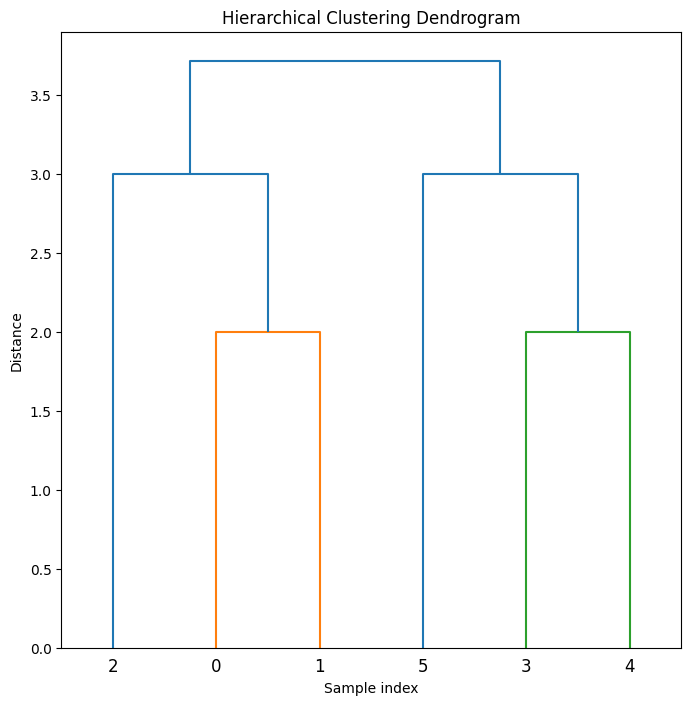

In [15]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

# Instantiate the clustering model and specify the linkage method
# Options for linkage are 'ward', 'complete', 'average', 'single'
HClust = AgglomerativeClustering(linkage='complete', n_clusters=None, distance_threshold=0)

# Fit the model to the data
hc_comp = HClust.fit(X)

# To plot the dendrogram, we need to compute the linkage matrix
# which is not directly provided by AgglomerativeClustering
# We can use the 'linkage' function from scipy.cluster.hierarchy
from scipy.cluster.hierarchy import linkage

# Compute the linkage matrix
linkage_matrix = linkage(X, 
                         method='average', 
                         metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(8, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [21]:
import numpy as np
from scipy.cluster.hierarchy import linkage

# Example dataset
X = np.array([[1, 2], [2, 3], [3, 2], [5, 8], [8, 8], [9, 10]])

# Compute the linkage matrix using the desired linkage method, e.g., 'single', 'complete', 'average', 'ward'
Z = linkage(X, 
            method='single', # single, complete, average, ward
            metric='euclidean')

# Print the linkage matrix
print(Z)

[[0.         1.         1.41421356 2.        ]
 [2.         6.         1.41421356 3.        ]
 [4.         5.         2.23606798 2.        ]
 [3.         8.         3.         3.        ]
 [7.         9.         5.83095189 6.        ]]


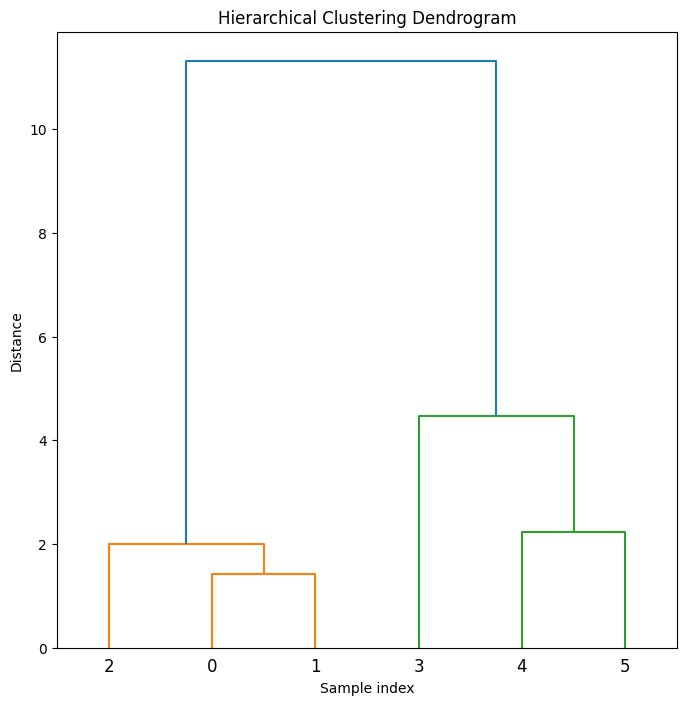

In [20]:
# Plot dendrogram
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Hierarchical Clustering Algorithm
1. Begin with n observations and a measure (such as Euclidean distance) of all the $\binom{n}{2}$ = n(n - 1)/2 pairwise dissimilarities. Treat each observation as its own cluster.
2. For i = n, n - 1, ..., 2:
	**(a)** Examine all pairwise inter-cluster dissimilarities among the i clusters and identify the pair of clusters that are least dissimilar (that is, most similar). Fuse these two clusters. The dissimilarity between these two clusters indicates the height in the dendro-gram at which the fusion should be placed.
	**(b)** Compute the new pairwise inter-cluster dissimilarities among the i - 1 remaining clusters

In [40]:
# Implementação do algoritmo de clustering hierárquico aglomerativo from scratch
# Função recebe uma matriz de dados e retorna uma matriz de ligação

import numpy as np

def hierarchical_clustering(X, linkage='single'):
    def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def find_closest_clusters(cluster_distances):
        min_dist = np.inf
        clusters_to_merge = (-1, -1)
        for i, j in zip(*np.triu_indices_from(cluster_distances, k=1)):
            if cluster_distances[i, j] < min_dist:
                min_dist = cluster_distances[i, j]
                clusters_to_merge = (i, j)
        return clusters_to_merge, min_dist

    def single_linkage(c1, c2):
        min_dist = np.inf
        for i in c1:
            for j in c2:
                if distances[i, j] < min_dist:
                    min_dist = distances[i, j]
        return min_dist

    # Step 1: Initialize clusters and compute pairwise distances
    n = X.shape[0]
    clusters = {i: [i] for i in range(n)}
    distances = np.array([[euclidean_distance(X[i], X[j]) for j in range(X.shape[0])] for i in range(X.shape[0])])
    cluster_distances = distances.copy()
    np.fill_diagonal(cluster_distances, np.inf)

    # Initialize dendrogram
    linkage_matrix = []
    
    # Step 2: Iteratively merge clusters
    for _ in range(n - 1):
        # Step 2(a): Find the two closest clusters
        (i, j), dist = find_closest_clusters(cluster_distances) # (i, j) is the index of the closest clusters, dist is the distance between them
        linkage_matrix.append([i, j, dist, len(clusters[i]) + len(clusters[j])]) # format: [idx1, idx2, dist, sample_count]

        # Step 2(b): Merge clusters and update distances
        new_cluster = clusters[i] + clusters[j]  # This line should be indented correctly
        for k in clusters:
            if k != i and k != j:
                if linkage == 'single':
                    c_dist = single_linkage(clusters[k], new_cluster)
                else:
                    raise ValueError("Unsupported linkage criterion.")
                cluster_distances[k, i] = cluster_distances[i, k] = c_dist  # Update the distance between cluster k and the new cluster
        cluster_distances[j, :] = cluster_distances[:, j] = np.inf  # Remove cluster j from the distance matrix
        
        # Update clusters
        clusters[i] = new_cluster
        del clusters[j]

    return np.array(linkage_matrix)
    
# Example usage:
# X is a 2D array where each row is an observation and each column is a feature.
# For example, X could be:
X = np.array([[1, 2], [2, 3], [3, 2], [5, 8], [8, 8], [9, 10]])

linkage_matrix = hierarchical_clustering(X)

print(linkage_matrix)




[[0.         1.         1.41421356 2.        ]
 [0.         2.         1.41421356 3.        ]
 [4.         5.         2.23606798 2.        ]
 [3.         4.         3.         3.        ]
 [0.         3.         5.83095189 6.        ]]


In [49]:
# Load data frame from csv file e 
# usa implementação do algoritmo de clustering hierárquico aglomerativo from scratch 
# função recebe um dataframe e retorna uma matriz de ligação

import pandas as pd

def hierarchical_clustering(df, linkage='single'):
    def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def find_closest_clusters(cluster_distances):
        min_dist = np.inf
        clusters_to_merge = (-1, -1)
        for i, j in zip(*np.triu_indices_from(cluster_distances, k=1)):
            if cluster_distances[i, j] < min_dist:
                min_dist = cluster_distances[i, j]
                clusters_to_merge = (i, j)
        return clusters_to_merge, min_dist

    def single_linkage(c1, c2):
        min_dist = np.inf
        for i in c1:
            for j in c2:
                if distances[i, j] < min_dist:
                    min_dist = distances[i, j]
        return min_dist

    # Convert DataFrame to NumPy array if necessary
    if isinstance(df, pd.DataFrame):
        X = df.values
    else:
        X = df

    # Step 1: Initialize clusters and compute pairwise distances
    n = X.shape[0] # Número de linhas do dataframe
    clusters = {i: [i] for i in range(n)} # Cria um dicionário com os índices das linhas do dataframe
    distances = np.array([[euclidean_distance(X[i], X[j]) for j in range(n)] for i in range(n)]) # Cria uma matriz de distâncias euclidianas entre as linhas do dataframe
    cluster_distances = distances.copy() # Cria uma cópia da matriz de distâncias
    np.fill_diagonal(cluster_distances, np.inf) # Preenche a diagonal da matriz de distâncias com infinito

    # Initialize linkage matrix 
    linkage_matrix = []

    # Step 2: Iteratively merge clusters
    for _ in range(n - 1):
        # Step 2(a): Find the two closest clusters
        (i, j), dist = find_closest_clusters(cluster_distances)

        linkage_matrix.append([i, j, dist, len(clusters[i]) + len(clusters[j])])

        # Step 2(b): Merge clusters and update distances
        new_cluster = clusters[i] + clusters[j]
        for k in clusters:
            if k != i and k != j:
                if linkage == 'single':
                    c_dist = single_linkage(clusters[k], new_cluster)
                else:
                    raise ValueError("Unsupported linkage criterion.")
                cluster_distances[k, i] = cluster_distances[i, k] = c_dist
        cluster_distances[j, :] = cluster_distances[:, j] = np.inf

        # Update clusters
        clusters[i] = new_cluster
        del clusters[j]

    return np.array(linkage_matrix)
    
# USAGE

home_data = pd.read_csv('housing.csv')

# Seleciona do dataframe apenas as primeiras linhas que serão utilizadas
X = home_data[['longitude', 'latitude']].head() #.values

#print(type(X))
#print(X)

linkage_matrix = hierarchical_clustering(X, linkage='single')

print(linkage_matrix)

#print(X)

[[3.         4.         0.         2.        ]
 [2.         3.         0.01       3.        ]
 [1.         2.         0.02236068 4.        ]
 [0.         1.         0.02236068 5.        ]]


In [23]:
import scipy.cluster.hierarchy as shc

X = home_data[['longitude', 'latitude']].head()
print(X)

Z = shc.linkage(X,
                method='single',
                metric='euclidean'
               )

print(Z)
print(Z.shape)

   longitude  latitude
0    -122.23     37.88
1    -122.22     37.86
2    -122.24     37.85
3    -122.25     37.85
4    -122.25     37.85
[[3.         4.         0.         2.        ]
 [2.         5.         0.01       3.        ]
 [1.         6.         0.02236068 4.        ]
 [0.         7.         0.02236068 5.        ]]
(4, 4)


linkage_data com linkage='single':


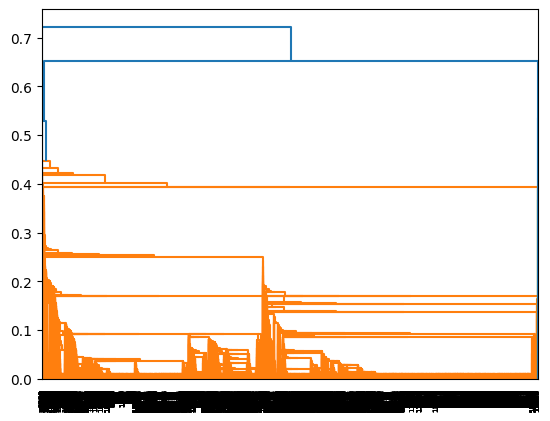

linkage_data com linkage='complete':


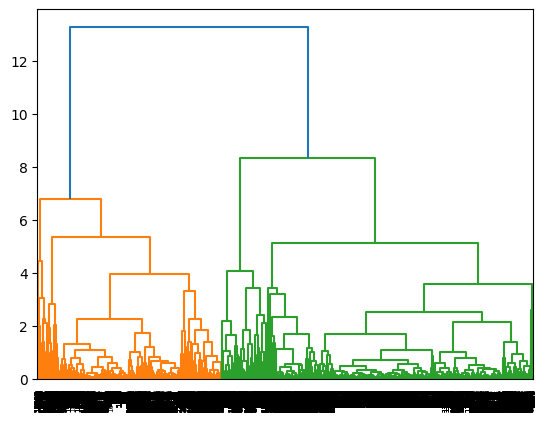

In [11]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

#x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
#y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
#data = list(zip(x, y))

home_data = pd.read_csv('housing.csv')
data = home_data[['longitude', 'latitude']] #.head(9000)
x = data['longitude'].values
y = data['latitude'].values

print("linkage_data com linkage='single':")
linkage_data =  (data, method='single', metric='euclidean') # linkage_data is a numpy array of shape (n-1, 4)
dendrogram(linkage_data)  # dendrogram plots the dendrogram
plt.show() # shows the plot

print("linkage_data com linkage='complete':")
linkage_data_complete = linkage(data, method='complete', metric='euclidean') # linkage_data is a numpy array of shape (n-1, 4)
dendrogram(linkage_data_complete)  # dendrogram plots the dendrogram
plt.show() # shows the plot